# KNN: Breast Cancer Wisconsin (Diagnostic) Dataset (D1) - Original

## Loading Packages

In [593]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [594]:
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label
y = df["diagnosis"]

## Data Preparation

#### Training Set

In [595]:
data_train_df = data_df.sample(frac=0.8, random_state=0) # sample 80% for training 
data_train_y = y[data_train_df.index]   

data_train_df.head()

,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,concavity_0ean,concave points_0ean,sy00etry_0ean,fractal_di0ension_0ean,...,radius_worst,texture_worst,peri0eter_worst,area_worst,s0oothness_worst,co0pactness_worst,concavity_worst,concave points_worst,sy00etry_worst,fractal_di0ension_worst
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [596]:
data_train_y

512    0
457    1
439    1
298    1
37     1
      ..
86     0
266    1
36     0
193    0
58     1
Name: diagnosis, Length: 455, dtype: int64

#### Test Set

In [597]:
data_test_df = data_df.drop(data_train_df.index) # get remaining 20%
data_test_y = y[data_test_df.index]       

data_test_df.head()

,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,concavity_0ean,concave points_0ean,sy00etry_0ean,fractal_di0ension_0ean,...,radius_worst,texture_worst,peri0eter_worst,area_worst,s0oothness_worst,co0pactness_worst,concavity_worst,concave points_worst,sy00etry_worst,fractal_di0ension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
9,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
23,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,0.05278,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
28,15.30,25.27,102.40,732.4,0.10820,0.1697,0.1683,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.2024,0.4027,0.09876
41,10.95,21.35,71.90,371.1,0.12270,0.1218,0.1044,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.4023,0.1424,0.2964,0.09606


## Creating and Training the Model

#### k = 1

In [598]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=1)

#### k = 3

In [599]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=3)

## Predicting Labels for Test Set

In [600]:
# k = 1
knn1_prediction = knn1.predict(data_test_df)
knn1_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [601]:
# k = 3
knn3_prediction = knn3.predict(data_test_df)
knn3_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

## Evaluating the KNN Models

#### Results for k = 1

In [602]:
# Accuracy
acc1 = knn1.score(data_test_df, data_test_y)
acc1

0.9210526315789473

In [603]:
# Confusion Matrix
cm1 = confusion_matrix(data_test_y, knn1_prediction)
cm1

array([[38,  6],
       [ 3, 67]], dtype=int64)

#### Results for k = 3

In [604]:
# Accuracy (Best Accuracy)
acc3 = knn3.score(data_test_df, data_test_y)
acc3

0.9473684210526315

In [605]:
# Confusion Matrix
cm3 = confusion_matrix(data_test_y, knn3_prediction)
cm3

array([[39,  5],
       [ 1, 69]], dtype=int64)

In [606]:
print("kNN, k = 1 accuracy:", acc1)
print(cm1)

print("kNN, k = 3 accuracy:", acc3)
print(cm3)

kNN, k = 1 accuracy: 0.9210526315789473
[[38  6]
 [ 3 67]]
kNN, k = 3 accuracy: 0.9473684210526315
[[39  5]
 [ 1 69]]


In [646]:
# range 5 - 11
best_k = 0
best_k_model = None
best_k_acc = 0

for k in range(5,12):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_df, data_train_y)
    
    score = knn.score(data_test_df, data_test_y)
    print("K = " + str(k))
    print("Accuracy: " + str(score) + "\n")

K = 5
Accuracy: 0.9122807017543859

K = 6
Accuracy: 0.8991228070175439

K = 7
Accuracy: 0.9035087719298246

K = 8
Accuracy: 0.8947368421052632

K = 9
Accuracy: 0.9035087719298246

K = 10
Accuracy: 0.9078947368421053

K = 11
Accuracy: 0.9166666666666666



# Decision Tree

### Loading Packages

In [607]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#### First 10 Features

In [608]:

# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_df2 = data_df[['radius_0ean', 'texture_0ean', 'peri0eter_0ean', 
                    'area_0ean', 's0oothness_0ean', 'co0pactness_0ean', 
                    'concavity_0ean', 'concave points_0ean', 'sy00etry_0ean', 'fractal_di0ension_0ean']]
y = df["diagnosis"]  
data_classes = ["0", "1"]                   

data_features = data_df2.columns.tolist()
data_features

['radius_0ean',
 'texture_0ean',
 'peri0eter_0ean',
 'area_0ean',
 's0oothness_0ean',
 'co0pactness_0ean',
 'concavity_0ean',
 'concave points_0ean',
 'sy00etry_0ean',
 'fractal_di0ension_0ean']

In [609]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [610]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [611]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.8728070175438597
[[ 76  13]
 [ 16 123]]


In [612]:
# Decision Tree Viz (First 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- concave points_0ean <= 0.06
|   |--- area_0ean <= 696.25
|   |   |--- concave points_0ean <= 0.04
|   |   |   |--- concave points_0ean <= 0.03
|   |   |   |   |--- texture_0ean <= 22.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- texture_0ean >  22.45
|   |   |   |   |   |--- texture_0ean <= 22.59
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- texture_0ean >  22.59
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- concave points_0ean >  0.03
|   |   |   |   |--- co0pactness_0ean <= 0.06
|   |   |   |   |   |--- radius_0ean <= 13.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- radius_0ean >  13.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- co0pactness_0ean >  0.06
|   |   |   |   |   |--- concave points_0ean <= 0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- concave points_0ean >  0.03
|   |   |   |   |   |   |--- class: 1
|   |   |--- concave points_0ean >  0.04
|   |   |   |--- fractal_di0ension

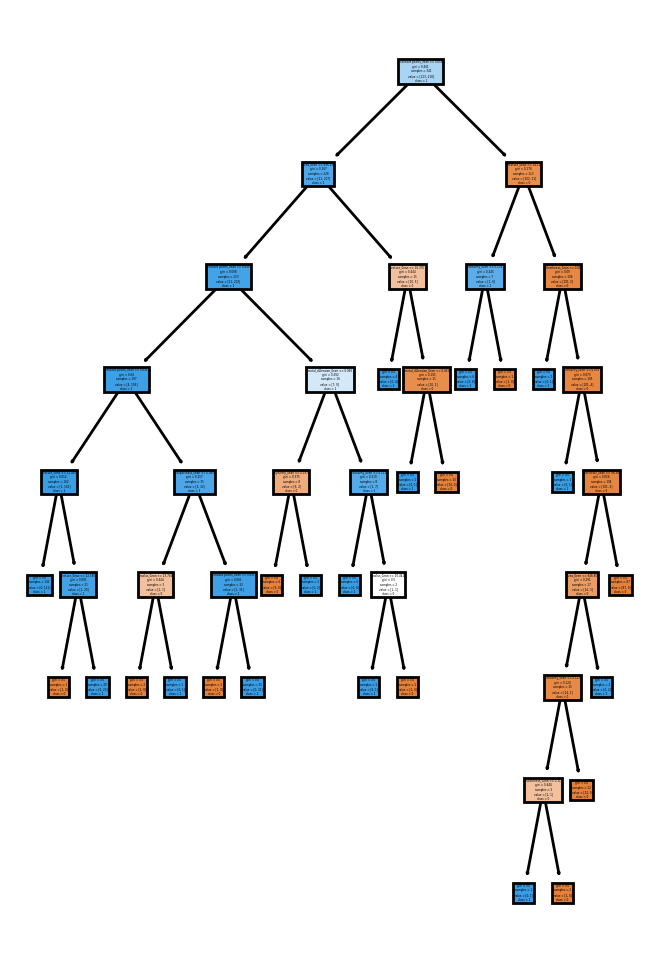

In [613]:
# Decision Tree Better Viz (First 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Middle 10 Features

In [614]:

# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_df2 = data_df[['radius_se', 'texture_se', 'peri0eter_se', 'area_se', 
                    's0oothness_se', 'co0pactness_se', 'concavity_se', 
                    'concave points_se', 'sy00etry_se', 'fractal_di0ension_se']]
y = df["diagnosis"]  
data_classes = ["0", "1"]                   

data_features = data_df2.columns.tolist()
data_features

['radius_se',
 'texture_se',
 'peri0eter_se',
 'area_se',
 's0oothness_se',
 'co0pactness_se',
 'concavity_se',
 'concave points_se',
 'sy00etry_se',
 'fractal_di0ension_se']

In [615]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [616]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [617]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.7807017543859649
[[ 67  22]
 [ 28 111]]


In [618]:
# Decision Tree Viz (Middle 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- area_se <= 33.00
|   |--- s0oothness_se <= 0.00
|   |   |--- class: 0
|   |--- s0oothness_se >  0.00
|   |   |--- co0pactness_se <= 0.03
|   |   |   |--- sy00etry_se <= 0.02
|   |   |   |   |--- concave points_se <= 0.01
|   |   |   |   |   |--- sy00etry_se <= 0.02
|   |   |   |   |   |   |--- peri0eter_se <= 1.75
|   |   |   |   |   |   |   |--- s0oothness_se <= 0.00
|   |   |   |   |   |   |   |   |--- concavity_se <= 0.01
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- concavity_se >  0.01
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- s0oothness_se >  0.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- peri0eter_se >  1.75
|   |   |   |   |   |   |   |--- s0oothness_se <= 0.00
|   |   |   |   |   |   |   |   |--- concave points_se <= 0.01
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- concave points_se >  0.01
|   |   |   |   |   |   | 

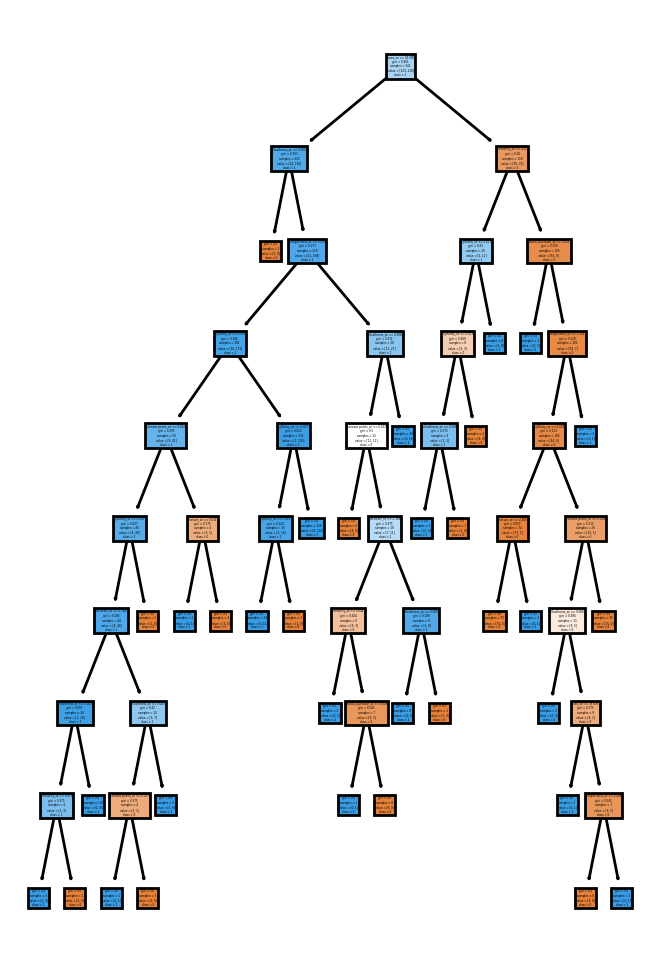

In [619]:
# Decision Tree Better Viz (Middle 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Last 10 Features

In [620]:

# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_df2 = data_df[['radius_worst', 'texture_worst', 'peri0eter_worst', 'area_worst', 
                    's0oothness_worst', 'co0pactness_worst', 'concavity_worst',
                    'concave points_worst', 'sy00etry_worst', 'fractal_di0ension_worst']]
y = df["diagnosis"]  
data_classes = ["0", "1"]                   

data_features = data_df2.columns.tolist()
data_features

['radius_worst',
 'texture_worst',
 'peri0eter_worst',
 'area_worst',
 's0oothness_worst',
 'co0pactness_worst',
 'concavity_worst',
 'concave points_worst',
 'sy00etry_worst',
 'fractal_di0ension_worst']

In [621]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [622]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [623]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.9166666666666666
[[ 81   8]
 [ 11 128]]


In [624]:
# Decision Tree Viz (Last 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- peri0eter_worst <= 105.15
|   |--- concave points_worst <= 0.17
|   |   |--- sy00etry_worst <= 0.16
|   |   |   |--- class: 0
|   |   |--- sy00etry_worst >  0.16
|   |   |   |--- texture_worst <= 31.63
|   |   |   |   |--- sy00etry_worst <= 0.20
|   |   |   |   |   |--- concave points_worst <= 0.07
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- concave points_worst >  0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- sy00etry_worst >  0.20
|   |   |   |   |   |--- class: 1
|   |   |   |--- texture_worst >  31.63
|   |   |   |   |--- radius_worst <= 15.77
|   |   |   |   |   |--- s0oothness_worst <= 0.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- s0oothness_worst >  0.14
|   |   |   |   |   |   |--- texture_worst <= 32.63
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- texture_worst >  32.63
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- radius_worst >  15.77
|   |   |   |   |   |--- class: 0
|

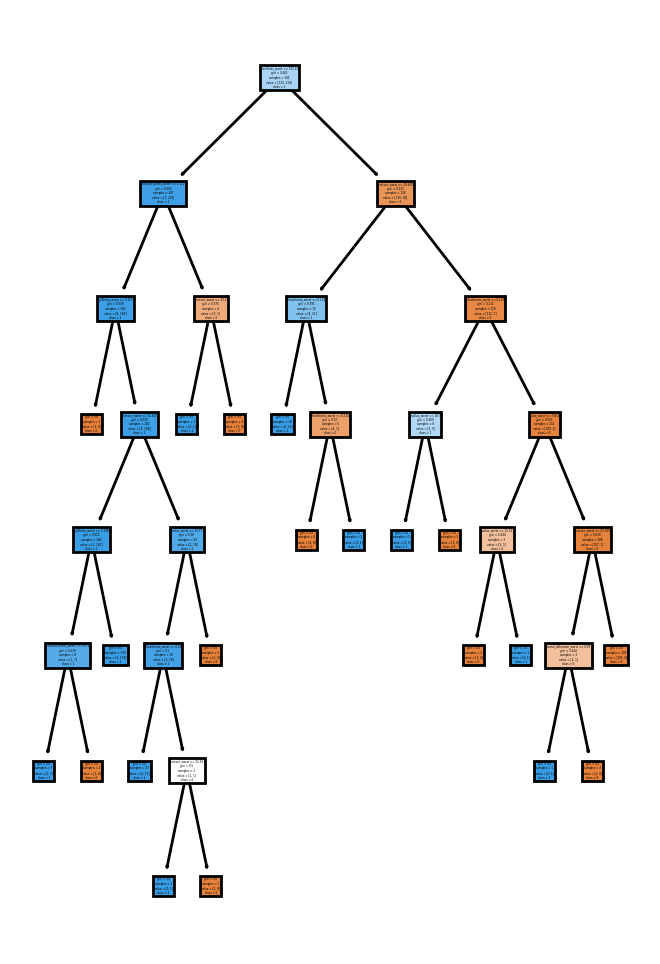

In [625]:
# Decision Tree Better Viz (Last 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

# Clustering

### Loading Packages

In [627]:
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [628]:
# Load Dataset
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label
y = df["diagnosis"]
data_df

,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,concavity_0ean,concave points_0ean,sy00etry_0ean,fractal_di0ension_0ean,...,radius_worst,texture_worst,peri0eter_worst,area_worst,s0oothness_worst,co0pactness_worst,concavity_worst,concave points_worst,sy00etry_worst,fractal_di0ension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [629]:
# two features selected (Apparently, also important: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043900/)

col1 = "fractal_di0ension_0ean"
col2 = "fractal_di0ension_worst"

In [630]:
# new dataframe with only two features
new_df = data_df[[col1, col2]]
new_df

,fractal_di0ension_0ean,fractal_di0ension_worst
0,0.07871,0.11890
1,0.05667,0.08902
2,0.05999,0.08758
3,0.09744,0.17300
4,0.05883,0.07678
...,...,...
564,0.05623,0.07115
565,0.05533,0.06637
566,0.05648,0.07820
567,0.07016,0.12400


<Axes: xlabel='fractal_di0ension_0ean', ylabel='fractal_di0ension_worst'>

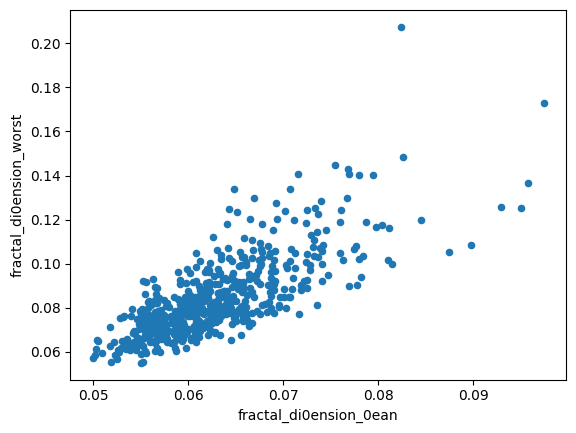

In [631]:
new_df.plot.scatter(col1, col2)

# Hierarchical Clustering

### Dendrogram

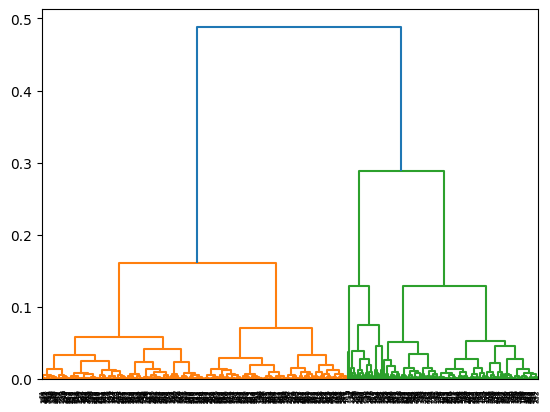

In [632]:
# Dendrogram

dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

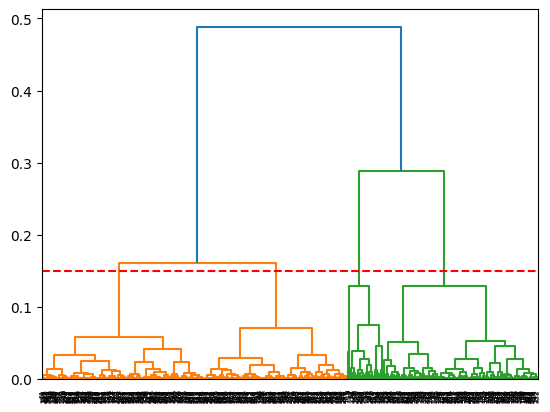

In [633]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

plt.axhline(y=0.15, color='r', linestyle='--')
plt.show()

In [634]:
agg_model = AgglomerativeClustering(n_clusters=4, 
                                    metric='euclidean', 
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='fractal_di0ension_0ean', ylabel='fractal_di0ension_worst'>

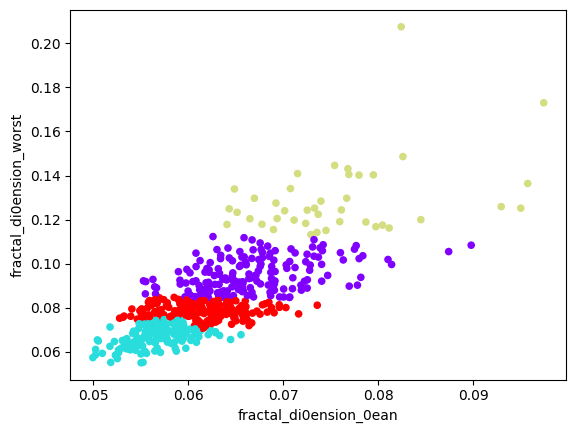

In [635]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

# K-Means

### Silhouette Score

In [636]:
# k_range is from k=2 to k=16 (same range as lab 3)
k_range = range(2, 17)


for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    
    print((k, round(avg, 4)))

(2, 0.5794)
(3, 0.4586)
(4, 0.4446)
(5, 0.4385)
(6, 0.4183)
(7, 0.4148)
(8, 0.3819)
(9, 0.3825)
(10, 0.3663)
(11, 0.3563)
(12, 0.3325)
(13, 0.3363)
(14, 0.3254)
(15, 0.3245)
(16, 0.3119)


In [637]:
# closest to 1 is cluster 2 (k = 2)
km_model = KMeans(n_clusters=2, 
                  n_init='auto', random_state=0)
km_model.fit(new_df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

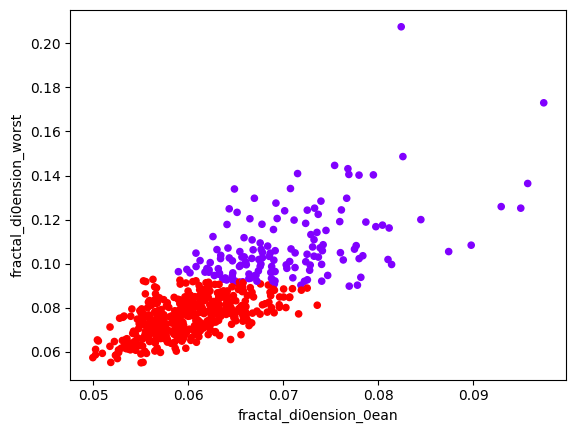

In [638]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Inertia: Elbow Method

In [639]:
# k_range is from k=1 to k=16 (same range as lab 3)
k_range = range(2, 17)

k_list = []
k_inertia_list = []

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
    km_model.fit(new_df)
    k_inertia_list.append(km_model.inertia_)
    
    k_list.append(k)
    
    print(str(k) + ": " + str(round(km_model.inertia_, 4)))

2: 0.087
3: 0.0524
4: 0.0365
5: 0.0292
6: 0.0224
7: 0.0198
8: 0.0166
9: 0.0152
10: 0.0139
11: 0.0132
12: 0.0118
13: 0.0104
14: 0.0094
15: 0.0088
16: 0.008


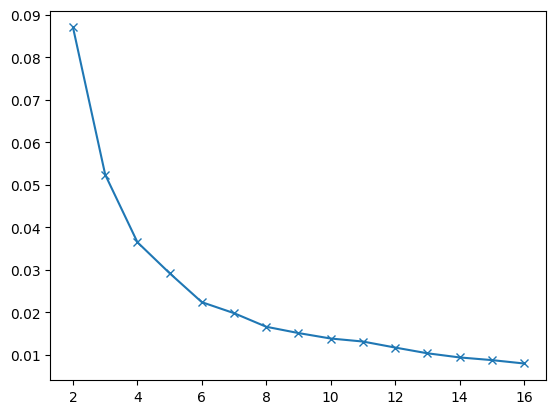

In [640]:
plt.plot(k_list, k_inertia_list, 'x-')
plt.show()

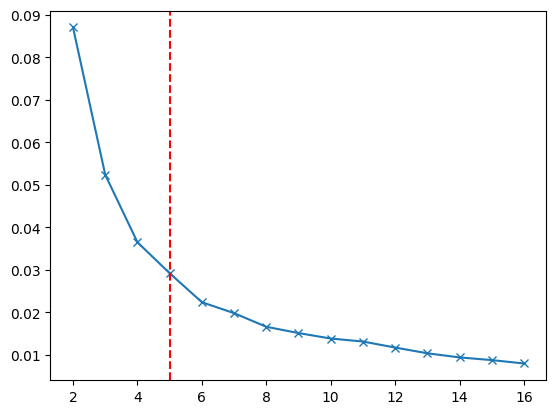

In [643]:
plt.plot(k_list, k_inertia_list, 'x-')

# plot a vertical line at x = 5 (k = 5)
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [644]:
km_model = KMeans(n_clusters=5, 
                  n_init="auto", 
                  random_state=1)
km_model.fit(new_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

<Axes: xlabel='fractal_di0ension_0ean', ylabel='fractal_di0ension_worst'>

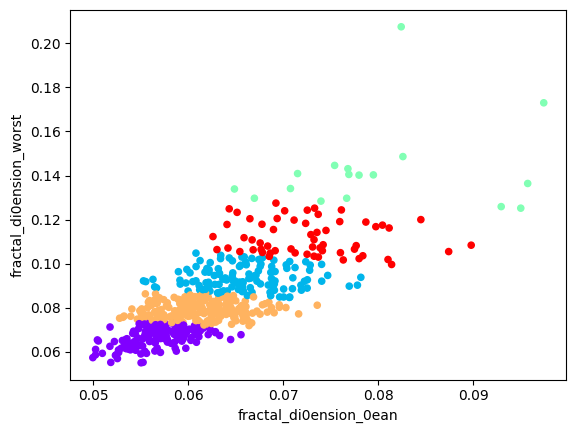

In [645]:
new_df.plot.scatter(col1, col2, c = km_model.labels_, 
                    cmap="rainbow",
                    colorbar=False)